# YELP Review Analysis Project :  

### In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

#### Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

RecSys2013: Yelp Business Rating Prediction :
https://www.kaggle.com/c/yelp-recsys-2013
    
    Dataset Link By Kaggle

### Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


In [5]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

## Basic Data Exploratory Analysis :

In [6]:
df['text-length']=df['text'].apply(len)

In [7]:
df['text-length'].head()

0     889
1    1345
2      76
3     419
4     469
Name: text-length, dtype: int64

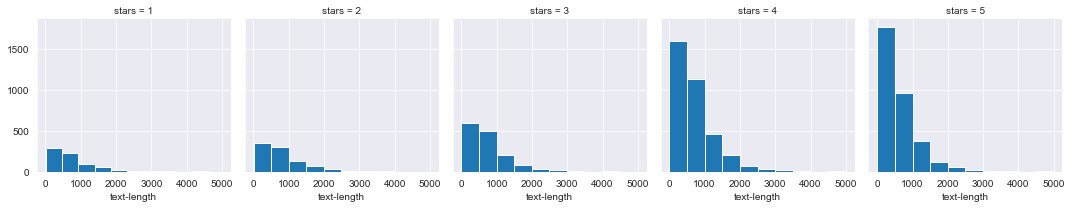

In [8]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text-length')

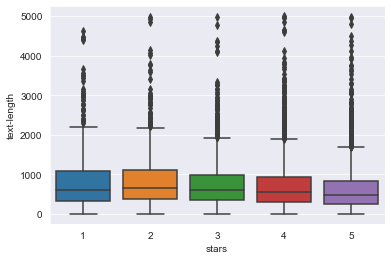

In [9]:
sns.boxplot(x='stars',y='text-length',data=df)

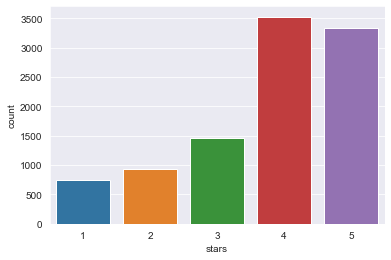

In [10]:
sns.countplot(x='stars',data=df)

In [11]:
stars=df.groupby('stars').mean()
stars

,cool,useful,funny,text-length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
df.corr()

,stars,cool,useful,funny,text-length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
text-length,-0.114674,0.241451,0.293975,0.251760,1.000000


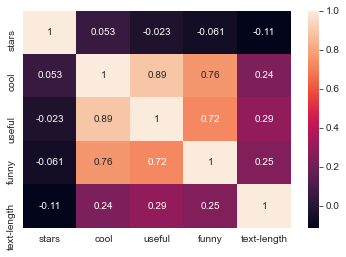

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.corr()['stars'].sort_values(ascending=False)

stars          1.000000
cool           0.052555
useful        -0.023479
funny         -0.061306
text-length   -0.114674
Name: stars, dtype: float64

## NLP Classification :

##### Let us Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [15]:
yelp_c=df[(df['stars']==1) | (df['stars']==5)]

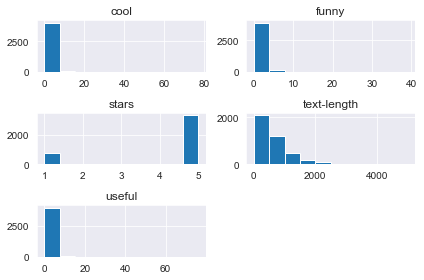

In [26]:
yelp_c.hist()
plt.tight_layout()

In [22]:
df[df['stars']==1].count()

business_id    749
date           749
review_id      749
stars          749
text           749
type           749
user_id        749
cool           749
useful         749
funny          749
text-length    749
dtype: int64

In [24]:
df[df['stars']==5].count()

business_id    3337
date           3337
review_id      3337
stars          3337
text           3337
type           3337
user_id        3337
cool           3337
useful         3337
funny          3337
text-length    3337
dtype: int64

In [16]:
X=yelp_c['text']
y=yelp_c['stars']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [18]:
cv=CountVectorizer()
X=cv.fit_transform(X)

## Train Test Split :

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
mb=MultinomialNB()

In [30]:
mb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [31]:
mb.predict(X_test)

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [32]:
pred=mb.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.81      0.63      0.71       231
           5       0.92      0.97      0.94       995

    accuracy                           0.90      1226
   macro avg       0.87      0.80      0.83      1226
weighted avg       0.90      0.90      0.90      1226



In [35]:
print('The Acuuracy Score is : ',accuracy_score(y_test,pred))

The Acuuracy Score is :  0.9029363784665579


##### Now we will be trying two different things to Evaluate our project:
    1. Including Tfidf
    2.Pipeline Method

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    
])

### Now we need to fit data in original form, since we have included our steps in Pipeline From Starting :

In [38]:
X1=yelp_c['text']
y1=yelp_c['stars']

In [39]:
 X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [40]:
pipeline.fit(X1_train,y1_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## Predictions And Evaluations :

In [41]:
pipeline.predict(X1_test)

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [42]:
pred_p=pipeline.predict(X1_test)

In [43]:
print(classification_report(y1_test,pred_p))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       231
           5       0.81      1.00      0.90       995

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(accuracy_score(y1_test,pred_p))

0.8115823817292006


### Looks like Tfidf Transformer made our model worse..Let us remove it from our pipeline and try it again with new pipeline model :

In [45]:
X2=yelp_c['text']
y2=yelp_c['stars']

In [47]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=0)

In [49]:
pipe2=Pipeline([
    ('bow',CountVectorizer()),
    ('classifier',MultinomialNB())
    
    
])

In [50]:
pipe2.fit(X2_train,y2_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [51]:
pipe2.predict(X2_test)

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [52]:
pred_p2=pipe2.predict(X2_test)

In [59]:
df7=pd.DataFrame({'Actual Values ':y2_test,'Predicted Values ':pred_p2})
df7.head(10)

,Actual Values,Predicted Values
7907,5,5
5421,5,5
6093,5,5
4744,5,5
7939,5,5
8681,1,5
9279,5,5
1750,5,5
9200,5,5
2356,5,5


## Evaluations of Pipeline 2 :

In [53]:
print(classification_report(y2_test,pred_p2))

              precision    recall  f1-score   support

           1       0.88      0.61      0.72       231
           5       0.92      0.98      0.95       995

    accuracy                           0.91      1226
   macro avg       0.90      0.80      0.83      1226
weighted avg       0.91      0.91      0.90      1226



In [55]:
print('The Accuracy Score :',round(accuracy_score(y2_test,pred_p2),2))

The Accuracy Score : 0.91


### So, To summarise , our second pipeline with only countvectoriser and naive bayes algorithm worked perfectly with 91 % accuracy 